<a href="https://colab.research.google.com/github/kolla118/KOLLA_INFO5731_Spring2020-/blob/main/In_class_exercise_05_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
pip install xgboost

In [ ]:
#Importing modules
import numpy as np
import pandas as pd
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, train_test_split

#Model imports
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
df_training = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
df_training[['Sentiment','Text']] = df_training["Text"].str.split(" ", 1, expand=True)

df_training.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Text,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
df_test = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
df_test[['Sentiment','Text']] = df_test["Text"].str.split(" ", 1, expand=True)
df_test.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Text,Sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [ ]:
# Write your code here

import os
import tweepy as tw
import pandas as pd
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

words = set(nltk.corpus.words.words())

def get_lemmatized_docs(document):
  stemmer = WordNetLemmatizer()
  eng_stop_word_list = stopwords.words("english")
  bag_of_words = []
  # removing all the special characters
  document = re.sub(r'\W', ' ', str(document))

  # removing all single characters
  document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

  # removing multiple spaces and adding single space in place
  document = re.sub(r'\s+', ' ', document, flags=re.I)

  # removing the 'b' prefix added during byte conversion
  document = re.sub(r'^b\s+', '', document)

  # removing numbers
  document = re.sub(r'\d+','',document)

  # converting all words to lowercase
  document = document.lower()
      
  # Splitting the cleaned document into a list of words, which will be subsequently added to a bag after more processing
  document = document.split()
  document = [stemmer.lemmatize(word) for word in document]
  document = [word for word in document if word not in eng_stop_word_list]
  document = ' '.join(document)
  document = " ".join(word for word in nltk.wordpunct_tokenize(document) if word.lower() in words or not word.isalpha())
  return document





[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(analyzer = get_lemmatized_docs)
X_tf_idf = tf_idf_vect.fit_transform(df_training['Text'])
X_tf_idf_dafrme=pd.DataFrame(X_tf_idf.toarray())
X_tf_idf_dafrme.columns=tf_idf_vect.get_feature_names()
X_test_tfidf = tf_idf_vect.transform(df_test['Text'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Classifers in Question
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()


In [ ]:
#Cross-validation 10 fold
cv = KFold(n_splits=10, shuffle=True, random_state=1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf_dafrme, df_training['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
MNB_test = MNB.fit(x_train,y_train)
y_MNB = MNB_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_MNB,y_test))
print(classification_report(y_test,y_MNB))
from sklearn.model_selection import cross_val_score
#accuracy
scores_MNB = cross_val_score(MNB, x_test, y_test, cv=cv)
print("Accuracy using MNB",scores_MNB.mean())

Accuracy Score 0.5079479768786127
              precision    recall  f1-score   support

           0       0.37      0.02      0.04       671
           1       0.51      0.97      0.67       713

    accuracy                           0.51      1384
   macro avg       0.44      0.49      0.35      1384
weighted avg       0.44      0.51      0.36      1384

Accuracy using MNB 0.5208580961317901


In [ ]:
SVM_test = SVM.fit(x_train,y_train)
y_SVM = SVM_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_SVM,y_test))
print(classification_report(y_test,y_SVM))
from sklearn.model_selection import cross_val_score
#accuracy
scores_SVM = cross_val_score(SVM, x_test, y_test, cv=cv)
print("Accuracy using SVM",scores_SVM.mean())

Accuracy Score 0.5715317919075145
              precision    recall  f1-score   support

           0       0.58      0.44      0.50       671
           1       0.57      0.70      0.63       713

    accuracy                           0.57      1384
   macro avg       0.57      0.57      0.56      1384
weighted avg       0.57      0.57      0.56      1384

Accuracy using SVM 0.5390001042644146


In [ ]:
# Write your code here

KNN_test = KNN.fit(x_train,y_train)
y_KNN = KNN_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_KNN,y_test))
print(classification_report(y_test,y_KNN))
from sklearn.model_selection import cross_val_score
#accuracy
scores_KNN = cross_val_score(KNN, x_test, y_test, cv=cv)
print("Accuracy using knn",scores_KNN.mean())

Accuracy Score 0.5267341040462428
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       671
           1       0.54      0.61      0.57       713

    accuracy                           0.53      1384
   macro avg       0.52      0.52      0.52      1384
weighted avg       0.53      0.53      0.52      1384

Accuracy using knn 0.5260243978730059


In [ ]:
dec_tree_test = DT.fit(x_train,y_train)
y_dec_tree = dec_tree_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_dec_tree,y_test))
print(classification_report(y_test,y_dec_tree))
#accuracy
scores_DT = cross_val_score(DT, x_test, y_test, cv=cv)
print("Accuracy using Decision trees",scores_DT.mean())

Accuracy Score 0.5086705202312138
              precision    recall  f1-score   support

           0       0.49      0.48      0.49       671
           1       0.52      0.53      0.53       713

    accuracy                           0.51      1384
   macro avg       0.51      0.51      0.51      1384
weighted avg       0.51      0.51      0.51      1384

Accuracy using Decision trees 0.5057449692419977


In [ ]:
RF_test = RF.fit(x_train,y_train)
y_RF = RF_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_RF,y_test))
print(classification_report(y_test,y_RF))
#accuracy
scores_RF = cross_val_score(RF, x_test, y_test, cv=cv)
print("Accuracy using Random Forest",scores_RF.mean())

Accuracy Score 0.5498554913294798
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       671
           1       0.56      0.61      0.58       713

    accuracy                           0.55      1384
   macro avg       0.55      0.55      0.55      1384
weighted avg       0.55      0.55      0.55      1384

Accuracy using Random Forest 0.5426389323323949


In [ ]:
XGB_test = XGB.fit(x_train,y_train)
#prediction
y_XGB = XGB_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_XGB,y_test))
print(classification_report(y_test,y_XGB))
#accuracy
scores_XGB = cross_val_score(XGB, x_test, y_test, cv=cv)
print("Accuracy using XGBoost",scores_XGB.mean())

Accuracy Score 0.5549132947976878
              precision    recall  f1-score   support

           0       0.55      0.45      0.49       671
           1       0.56      0.66      0.60       713

    accuracy                           0.55      1384
   macro avg       0.55      0.55      0.55      1384
weighted avg       0.55      0.55      0.55      1384

Accuracy using XGBoost 0.5202585757480972


In [ ]:
svm_classifed_result = SVM_test.predict(X_test_tfidf)
print(accuracy_score(svm_classifed_result,df_test['Sentiment']))

0.5683690280065898


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
import pandas as pd
#load the data
sample=pd.read_csv("../content/Amazon_Unlocked_Mobile.csv")
sample.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


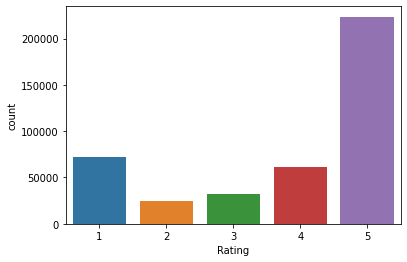

In [ ]:
import seaborn as sns
sns.countplot(sample.Rating)

In [ ]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with Rating less than 3 to be positive
actualScore = sample['Rating']
positiveNegative = actualScore.map(partition) 
sample['RatingTransformed'] = positiveNegative

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


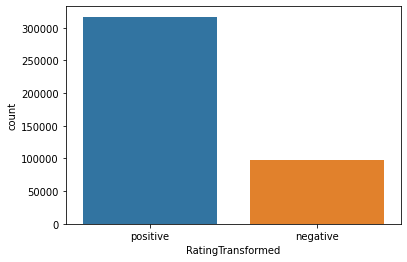

In [ ]:
sns.countplot(sample.RatingTransformed)


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#initialising the snowball stemmer which is developed in recent years
sno = nltk.stem.SnowballStemmer('english') 
stop=set(stopwords.words('english'))

final = sample

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Write your code here.

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence):
    cleaned_data = re.sub(r'[?|!|\'|"|#]',r'',sent)
    cleaned_data = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned_data)
    return  cleaned_data



In [ ]:
final = sample.sample(n=1000, random_state=1)

In [ ]:
# Clean text
import re

i=0
str1=' '
final_string=[]
# store words from +ve reviews here
all_positive_words=[] 
# store words from -ve reviews here.
all_negative_words=[] 
s=''
for sent in final['Reviews'].values:
    filtered_sent=[]
    #sent=cleanhtml(sent) # remove HTMl tags
    try:
      for w in sent.split():
          for cleaned_words in cleanpunc(w).split():
              if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                  if(cleaned_words.lower() not in stop):
                      s=(sno.stem(cleaned_words.lower())).encode('utf8')
                      filtered_sent.append(s)
                      if (final['RatingTransformed'].values)[i] == 'positive': 
                        #list of all words used to describe positive reviews
                          all_positive_words.append(s) 
                      if(final['RatingTransformed'].values)[i] == 'negative':
                        #list of all words used to describe negative reviews reviews
                          all_negative_words.append(s) 
                  else:
                      continue
              else:
                  continue 
                   #final string of cleaned words
      str1 = b" ".join(filtered_sent)
      
      #print('str1:', str1)
      final_string.append(str1)
      i+=1
    except AttributeError as e:
      # No words to split
      final_string.append('')
      i+=1

In [ ]:
final['CleanedText']=final_string 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#bow = count_vect.fit_transform(final['CleanedText'].values)
bow = count_vect.fit_transform(final['CleanedText'].values)
print(bow.shape)

(1000, 2660)


In [ ]:
terms = count_vect.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [ ]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.8677877653732496

In [ ]:
dafrme = final
dafrme['Bow Clus Label'] = model.labels_ 
dafrme.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2


In [ ]:
dafrme.groupby(['Bow Clus Label'])['Reviews'].count()


Bow Clus Label
0     34
1      1
2    958
3      1
4      1
5      1
6      1
7      1
8      1
9      1
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 use
 batteri
 like
 good
 camera
 time
 one
 get
 screen
Cluster 1: phone
 seller
 month
 work
 samsung
 report
 return
 said
 unlock
 stolen
Cluster 2: phone
 work
 use
 great
 get
 good
 one
 screen
 like
 time
Cluster 3: phone
 got
 month
 product
 later
 compani
 dont
 never
 give
 apart
Cluster 4: phone
 gps
 app
 problem
 get
 fix
 navig
 use
 screen
 work
Cluster 5: phone
 camera
 realli
 screen
 servic
 photo
 gps
 take
 compani
 need
Cluster 6: phone
 applic
 updat
 contact
 turn
 work
 deal
 quit
 tri
 facebook
Cluster 7: phone
 cabl
 issu
 tri
 port
 card
 factori
 qualiti
 connect
 proper
Cluster 8: phone
 small
 like
 sometim
 get
 micro
 take
 sinc
 usb
 use
Cluster 9: phone
 use
 flir
 one
 great
 your
 cant
 see
 there
 featur


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


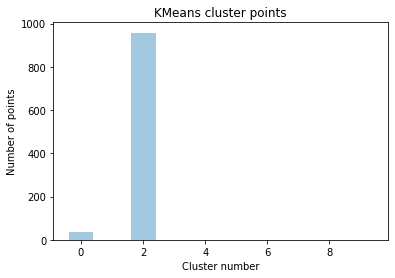

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], dafrme.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values)
tf_idf.shape

(1000, 2660)

In [ ]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10,random_state=99)
model_tf.fit(tf_idf)

KMeans(n_clusters=10, random_state=99)

In [ ]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.00211943, 0.00463832, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00025242, 0.00691803, ..., 0.0009042 , 0.00113021,
        0.00099414],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
terms1 = tf_idf_vect.get_feature_names()
terms1[1:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abil',
 'abl',
 'abnorm',
 'abroad',
 'absolut',
 'absurd',
 'acceler',
 'accent',
 'accept']

In [ ]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tf_idf, labels_tf, metric='euclidean')
silhouette_score_tf

0.0641401485898055

In [ ]:
dafrme1 = dafrme
dafrme1['Tfidf Clus Label'] = model_tf.labels_
dafrme1.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2,7
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2,3
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,negative,back camera stop work phone touch screen stop ...,2,5
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,positive,good,2,9
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0.0,positive,complaint work fine still work perfect tear we...,2,5


In [ ]:
dafrme1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     48
1    103
2     46
3    273
4     18
5     78
6     27
7    356
8      6
9     45
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: batteri
 charg
 phone
 life
 card
 hour
 sim
 month
 last
 even
Cluster 1: great
 love
 phone
 work
 price
 fast
 iphon
 good
 son
 thank
Cluster 2: excel
 product
 phone
 thank
 love
 everyth
 produtc
 describ
 good
 recommend
Cluster 3: product
 perfect
 good
 iphon
 thank
 expect
 like
 new
 time
 qualiti
Cluster 4: excelent
 producto
 punto
 telefono
 condit
 phone
 first
 flap
 flir
 flip
Cluster 5: work
 well
 fine
 phone
 doesnt
 perfect
 still
 expect
 stop
 good
Cluster 6: nice
 phone
 good
 product
 low
 work
 seller
 price
 camera
 came
Cluster 7: phone
 use
 one
 work
 screen
 love
 good
 unlock
 like
 get
Cluster 8: exelent
 producto
 ítem
 flake
 flir
 flip
 flawless
 flaw
 flash
 flap
Cluster 9: good
 product
 phone
 price
 qualiti
 realli
 star
 far
 problem
 expect


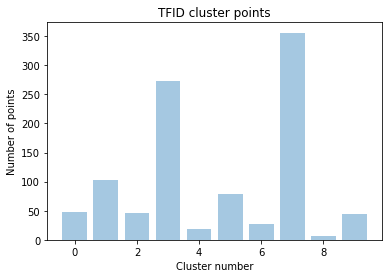

In [ ]:
plt.bar([x for x in range(10)], dafrme1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('TFID cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
#Average Word to Vector
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [ ]:
i=0
list_of_sent_train=[]
for sent in final['CleanedText'].values:
    filtered_sentence=[]
    for w in sent.split():
      if(len(filtered_sentence) > 10000):
        continue
      for cleaned_words in cleanpunc(w).split():
        if(cleaned_words.isalpha()):
          filtered_sentence.append(cleaned_words.lower())
        else:
          continue 
    list_of_sent_train.append(filtered_sentence)
#print(list_of_sent_train)

In [ ]:
print(list_of_sent_train[:10])

[['year', 'cant', 'realli', 'complain', 'gave', 'teenag', 'replac', 'wait', 'upgrad', 'time', 'phone', 'use', 'crap', 'batteri', 'final', 'isnt', 'keep', 'anymor', 'wont', 'stay', 'charg', 'though', 'cant', 'realli', 'complain', 'phone', 'earpiec', 'doubl', 'extern', 'speaker', 'want', 'play', 'song', 'loud', 'wasnt', 'best', 'doabl', 'year', 'cant', 'realli', 'complain', 'gave', 'teenag', 'replac', 'wait', 'upgrad', 'time', 'phone', 'use', 'crap', 'batteri', 'final', 'isnt', 'keep', 'anymor', 'wont', 'stay', 'charg', 'though', 'cant', 'realli', 'complain', 'phone', 'earpiec', 'doubl', 'extern', 'speaker', 'want', 'play', 'song', 'loud', 'wasnt', 'best', 'doabl', 'year', 'cant', 'realli', 'complain', 'gave', 'teenag', 'replac', 'wait', 'upgrad', 'time', 'phone', 'use', 'crap', 'batteri', 'final', 'isnt', 'keep', 'anymor', 'wont', 'stay', 'charg', 'though', 'cant', 'realli', 'complain', 'phone', 'earpiec', 'doubl', 'extern', 'speaker', 'want', 'play', 'song', 'loud', 'wasnt', 'best', 'd

In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [ ]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(1000, 100)

In [ ]:
#K-Means Clustering
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

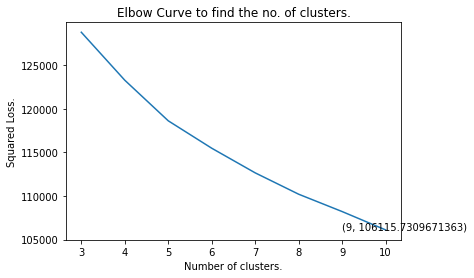

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  106115.7309671363


In [ ]:
# Choosing the best cluster using Elbow Method.
# source credit,few parts of min squred loss info is taken from different parts of the stakoverflow answers.
# this is used to understand to find the optimal clusters in differen way rather than used in BOW, TFIDF
squared_errors = []
for cluster in num_clus:
  # Train Cluster
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) 
    # Appending the squared loss obtained in the list
    squared_errors.append(kmeans.inertia_) 
# As argmin return the index of minimum loss.    
optimal_clusters = np.argmin(squared_errors) + 2  
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [ ]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(n_clusters=9)

In [ ]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[ 0.30357614,  1.82900333,  1.23955059, -1.44461462, -0.56507376,
         1.13861316,  1.40150897, -1.35486171, -0.26174252, -1.11513508,
         0.68943356,  0.64273156, -2.06551239, -1.12957473,  1.97681704,
         1.01041434,  0.65584153,  2.55286905,  0.7846064 ,  0.78054825,
         0.31449109, -1.56069426, -0.79308735, -0.29128573, -1.82416701,
         0.93037753, -0.85139094, -0.42624296,  2.03496772,  1.91805489,
         0.31795218, -1.64635707,  0.25851153,  0.4273592 , -1.18361854,
        -1.02932928,  0.38765604,  0.99342386, -0.17905443,  0.75965253,
         0.77545455,  0.67283596,  1.13382008,  1.48909331,  0.42076652,
         1.86063334,  0.44136718, -1.26110175,  1.07176033, -0.24461725,
        -1.80320259,  0.26088508,  1.87941641,  1.24544323,  0.79887729,
         1.6624589 , -0.7984725 , -2.07343574,  0.43163569, -1.23202921,
        -1.49613183,  1.42294117, -0.93755127,  1.79267783, -2.20150592,
         0.43975023, -1.19353262,  0.58663252,  0.8

In [ ]:
dafrmea = dafrme1
dafrmea['AVG-W2V Clus Label'] = model2.labels_
dafrmea.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2,7,3
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2,3,7


In [ ]:
dafrmea.groupby(['AVG-W2V Clus Label'])['Reviews'].count()


AVG-W2V Clus Label
0     11
1    148
2    304
3    397
4     74
5     33
6      5
7      5
8     23
Name: Reviews, dtype: int64

In [ ]:
#DBSCAN 
from sklearn.cluster import DBSCAN


# Computing 200th Nearest neighbour distance
min_Pts = 2 * 100
# The function returns the no in the array which is  greater than or equal to itself.
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    # Binary searching.
    while l <= r: 
        mid_term = int(l + (r - l) / 2)
        if nums[mid_term] >= target:
            r = mid_term - 1
        else:
            l = mid_term + 1
    return l
 # Returns the dist of 200th nearest neighbour.
def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
      # computing distances.
        dist = np.sum((x - val) **2 ) 
        # If dist is more than current largest distance found.
        if(len(dists) == 200 and dists[199] > dist): 
          # Using the lower bound function to get the right position.
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]


In [ ]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

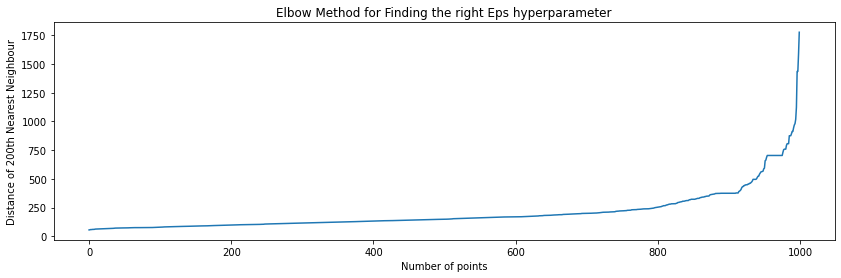

In [ ]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
# Training DBSCAN :
minPts = 2 * 100
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [ ]:
dfdb = dafrmea
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2,7,-1
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2,3,-1


In [ ]:
dfdb.groupby(['AVG-W2V Clus Label'])['Reviews'].count()


AVG-W2V Clus Label
-1    1000
Name: Reviews, dtype: int64

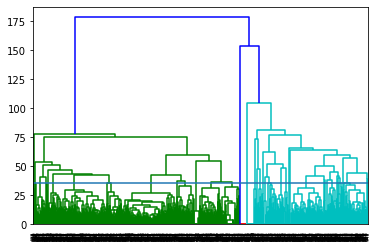

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingTransformed,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,2,7,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank perfect thank,2,3,4


In [ ]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()


AVG-W2V Clus Label
0    615
1    318
2     22
3     22
4     23
Name: Reviews, dtype: int64

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)

In machine learning, clustering techniques like as K-means and DBScan are widely used. In K-means clusters must have the same feature size when compared 
to DBScan it may not have the same feature size. K-means clusters are sensitive to the specified number of clusters. In DBScan no need to specify the 
number of clusters.K-means clustering is efficient for large data sets but DBScan can not handle high dimensional datasets.K-means has one parameter 
which is the number of clusters and DBScan has two parameters which are radius and minimum points
